# Erdos-Renyi random networks

In [1]:
import random
import networkx as nx
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

sb.set_theme(style="ticks", context="notebook")

## Write a random graph generator

In [2]:
def random_graph(N, p):
    
    G = nx.Graph()
    
    nodes = range(N)
    G.add_nodes_from(nodes)
    
    edges = []
    
    for i in nodes:
        for j in nodes[:i]:
            if random.random() < p:
                edges.append([i, j])
    
    G.add_edges_from(edges)
    
    return G

In [3]:
G = random_graph(10, 0.1)

In [4]:
N = 100
p = 0.8 / N 
G = random_graph(N, p)

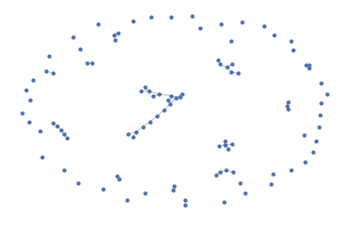

In [5]:
params = {
    "node_size": 10,
    "with_labels": False,
    "edge_color": "silver",
    "node_color": "b",
}

nx.draw_networkx(G, **params)

sb.despine(bottom=True, left=True)

plt.show()

## Analyse characteristics

In [6]:
N = 1000
p = 4 / N

G = nx.erdos_renyi_graph(N, p, seed=1)

In [8]:
params = {
    "node_size": 10,
    "with_labels": False,
    "edge_color": "silver",
    "node_color": "b",
}

pos = nx.spring_layout(G)

nx.draw_networkx(G, pos=pos, **params)

# identify largest connected component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
# highlight largest connected component
nx.draw_networkx_edges(G0, pos=pos, width=3.0, edge_color="r")

# draw other connected components
for Gi in Gcc[1:]:
    if len(Gi) > 1:
        nx.draw_networkx_edges(G.subgraph(Gi), pos, alpha=0.4, width=3.0, edge_color="r")


sb.despine(bottom=True, left=True)

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

In [9]:
print(f"Connected: {nx.is_connected(G)}")
print(f"# connected components: {len(list(nx.connected_components(G)))}")

print()
print(f"Size of largest connected component: {len(G0)}")
print(f"Prop. of nodes in it: {len(G0) / N:.2f}")

print()
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
print(f"Average degree: {np.average(degree_sequence)}")
print(f"Clustering coefficient: {nx.average_clustering(G)}")

Connected: False
# connected components: 26



NameError: name 'G0' is not defined

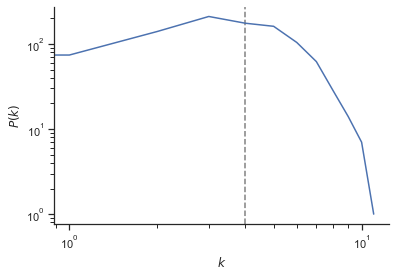

In [ ]:
deg, counts = np.unique(degree_sequence, return_counts=True)

fig, ax = plt.subplots()

ax.plot(deg, counts)

ax.axvline(np.average(degree_sequence), ls="--", c="grey", zorder=-1)

ax.set_xlabel("$k$")
ax.set_ylabel("$P(k)$")
plt.yscale("log")
plt.xscale("log")

sb.despine()

## Building the giant component

In [10]:
N = 1000

ks = np.arange(0, 5.1, 0.1)

ps = ks / (N - 1)

n_reps = 10

props_arr = np.zeros((len(ps), n_reps))

for i, p in enumerate(ps):
    for rep in range(n_reps):
        G = nx.erdos_renyi_graph(N, p)
        
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        G0 = G.subgraph(Gcc[0])
        
        prop = len(G0) / N
        props_arr[i, rep] = prop

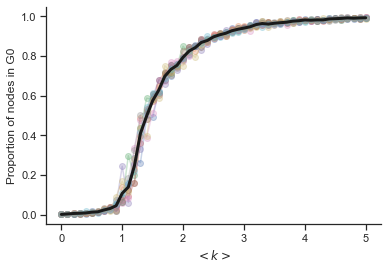

In [11]:
fig, ax = plt.subplots()

ax.plot(ks, props_arr[:, :], "-o", alpha=0.3)

ax.plot(ks, np.average(props_arr, axis=1), "k-", lw=3)

ax.set_ylabel("Proportion of nodes in G0")
ax.set_xlabel(r"$< k >$")

sb.despine()

## Configuration model

In [12]:
N = 20
p = 6 / N
G = random_graph(N, p)

degree_sequence = [d for n, d in G.degree()]

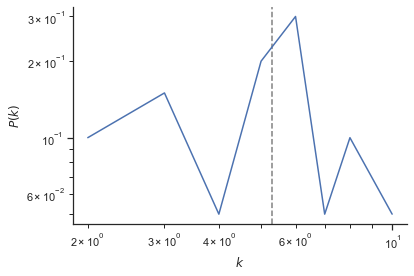

In [13]:
deg, counts = np.unique(degree_sequence, return_counts=True)

fig, ax = plt.subplots()
ax.plot(deg, counts / N)
ax.axvline(np.average(degree_sequence), ls="--", c="grey", zorder=-1)

ax.set_xlabel("$k$")
ax.set_ylabel("$P(k)$")
plt.yscale("log")
plt.xscale("log")

sb.despine()

In [14]:
G_conf = nx.configuration_model(degree_sequence)
G_conf = nx.Graph(G_conf)

degree_sequence_conf = [d for n, d in G.degree()]

In [15]:
print(G)

Graph with 20 nodes and 53 edges


In [16]:
print(G_conf)

Graph with 20 nodes and 49 edges


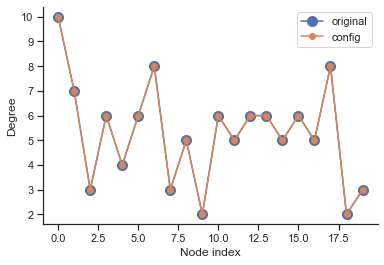

In [17]:
deg_conf, counts_conf = np.unique(degree_sequence_conf, return_counts=True)

fig, ax = plt.subplots()
ax.plot(degree_sequence, "o-", ms=10, label="original")
ax.plot(degree_sequence_conf, "o-", label="config")

ax.set_xlabel("Node index")
ax.set_ylabel("Degree")
#plt.yscale("log")
#plt.xscale("log")

ax.legend()

sb.despine()

In [18]:
print(G)
print(G_conf)

Graph with 20 nodes and 53 edges
Graph with 20 nodes and 49 edges


In [19]:
pos = nx.spring_layout(G)

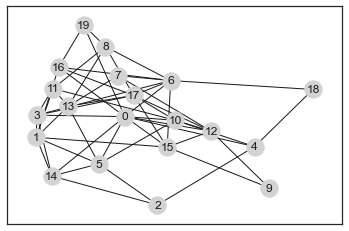

In [20]:
pos = nx.spring_layout(G, seed=1)
nx.draw_networkx(G, pos=pos, node_color="lightgrey")

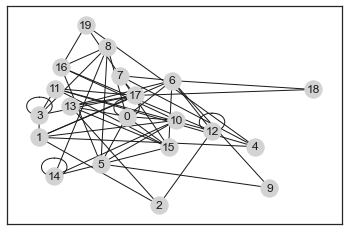

In [21]:
nx.draw_networkx(G_conf, pos=pos, node_color="lightgrey")

In [22]:
G_conf.remove_edges_from(nx.selfloop_edges(G_conf))

In [ ]:
# pos

# Other types of random graphs
## Watts-Strogatz 

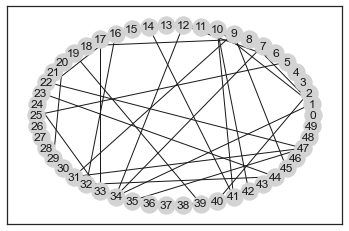

In [23]:
ws = nx.watts_strogatz_graph(50, 4, 0.3)

pos_ws = nx.circular_layout(ws)
nx.draw_networkx(ws, pos=pos_ws, node_color="lightgrey")

In [24]:
clu, sp = [], []
ps = np.linspace(0.001,1,100)
for p in ps:
    ws = nx.watts_strogatz_graph(1000, 6, p)
    clu.append(nx.average_clustering(ws))
    sp.append(nx.average_shortest_path_length(ws))

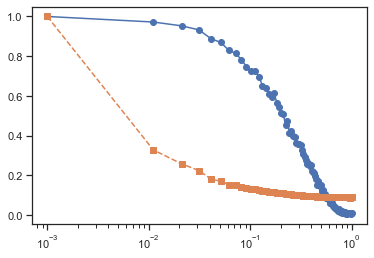

In [25]:
plt.semilogx(ps, np.array(clu)/clu[0],'-o');
plt.semilogx(ps, np.array(sp)/sp[0],'--s');

In [ ]:
#introduce tqdm

## Barabasi Albert 

In [26]:
ba = nx.barabasi_albert_graph(300, 3)

In [27]:
degs = ba.degree()
aa, bb = np.histogram(list(dict(degs).values()))

In [28]:
ws_degs = ws.degree()
ws_aa, ws_bb = np.histogram(list(dict(ws_degs).values()))

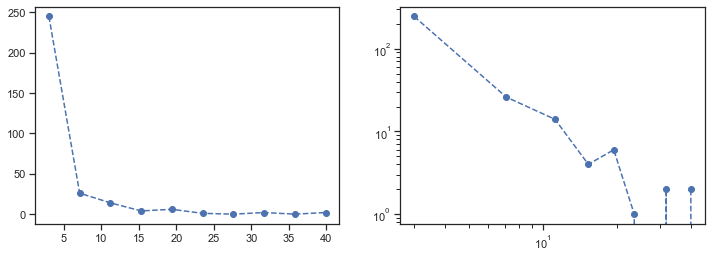

In [29]:
fig = plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(bb[:-1], aa, 'o--')
# plt.plot(ws_bb[:-1], ws_aa, 'r-')
plt.subplot(122)
plt.loglog(bb[:-1], aa, 'o--')
# plt.loglog(ws_bb[:-1], ws_aa, 'r-')

# Social networks?
## Les Miserables

In [30]:
les = nx.les_miserables_graph()
les.number_of_nodes(), les.number_of_edges()

(77, 254)

In [31]:
print(nx.density(les), nx.average_clustering(les), nx.average_shortest_path_length(les))

0.08680792891319207 0.5731367499320134 2.6411483253588517


In [32]:
les.nodes(data=True)
print(les.degree("Valjean"))

36


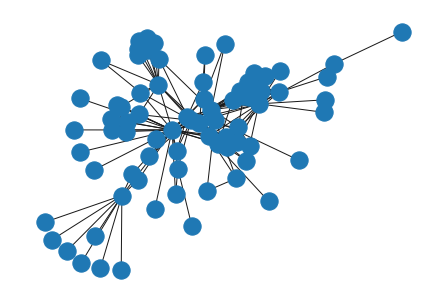

In [33]:
nx.draw(les)

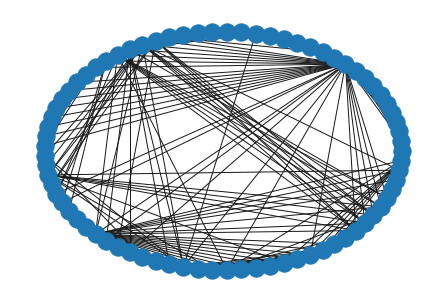

In [34]:
nx.draw_circular(les)

In [35]:
degree_sequence = sorted((d for n, d in les.degree()), reverse=True)
print(degree_sequence)
print(f"Average degree: {np.average(degree_sequence)}")
print(f"Clustering coefficient: {nx.average_clustering(les)}")

[36, 22, 19, 17, 16, 15, 15, 13, 13, 12, 12, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 9, 9, 9, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Average degree: 6.597402597402597
Clustering coefficient: 0.5731367499320134


In [36]:
for i in sorted(les.degree()):
    print(i[0], les.degree()[i[0]])

Anzelma 3
Babet 10
Bahorel 12
Bamatabois 8
BaronessT 2
Blacheville 7
Bossuet 13
Boulatruelle 1
Brevet 6
Brujon 7
Champmathieu 6
Champtercier 1
Chenildieu 6
Child1 2
Child2 2
Claquesous 10
Cochepaille 6
Combeferre 11
Cosette 11
Count 1
CountessDeLo 1
Courfeyrac 13
Cravatte 1
Dahlia 7
Enjolras 15
Eponine 11
Fameuil 7
Fantine 15
Fauchelevent 4
Favourite 7
Feuilly 11
Gavroche 22
Geborand 1
Gervais 1
Gillenormand 7
Grantaire 10
Gribier 1
Gueulemer 10
Isabeau 1
Javert 17
Joly 12
Jondrette 1
Judge 6
Labarre 1
Listolier 7
LtGillenormand 4
Mabeuf 11
Magnon 2
Marguerite 2
Marius 19
MlleBaptistine 3
MlleGillenormand 7
MlleVaubois 1
MmeBurgon 2
MmeDeR 1
MmeHucheloup 7
MmeMagloire 3
MmePontmercy 2
MmeThenardier 11
Montparnasse 9
MotherInnocent 2
MotherPlutarch 1
Myriel 10
Napoleon 1
OldMan 1
Perpetue 2
Pontmercy 3
Prouvaire 9
Scaufflaire 1
Simplice 4
Thenardier 16
Tholomyes 9
Toussaint 3
Valjean 36
Woman1 2
Woman2 3
Zephine 7


In [37]:
degs = les.degree()
aa, bb = np.histogram(list(dict(degs).values()))

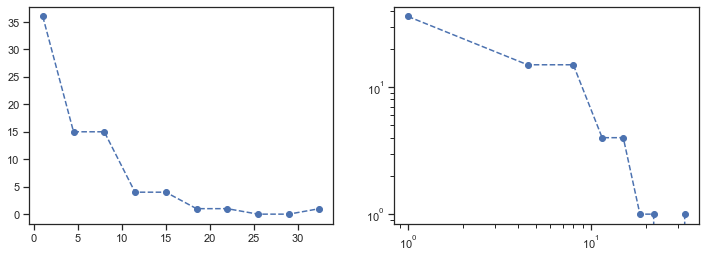

In [38]:
fig = plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(bb[:-1], aa, 'o--')
plt.subplot(122)
plt.loglog(bb[:-1], aa, 'o--')

0.16816816816816818 0.7157562451680097 1.8318318318318318


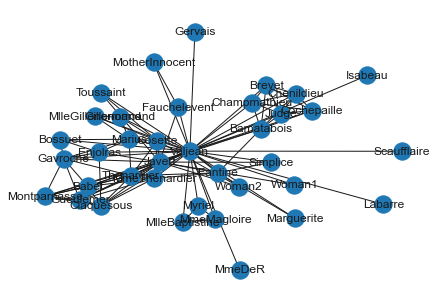

In [39]:
V = nx.ego_graph(les, "Valjean")
nx.draw(V, with_labels=True)
print(nx.density(V), nx.average_clustering(V), nx.average_shortest_path_length(V))

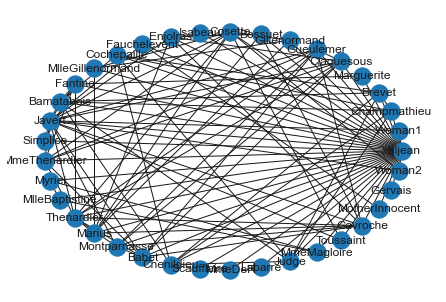

In [40]:
nx.draw_circular(V, with_labels=True)

0.39869281045751637 0.8103304284676833 1.6013071895424837


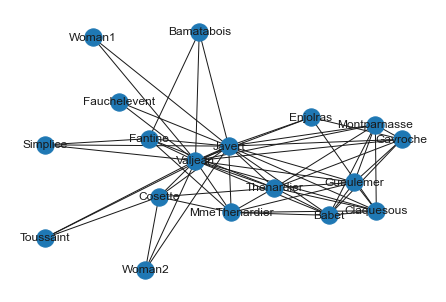

In [41]:
J = nx.ego_graph(les, "Javert")
nx.draw(J, with_labels=True)
print(nx.density(J), nx.average_clustering(J), nx.average_shortest_path_length(J))

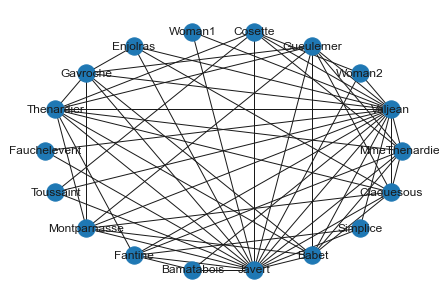

In [42]:
nx.draw_circular(J, with_labels=True)

0.48484848484848486 0.80767797017797 1.5151515151515151


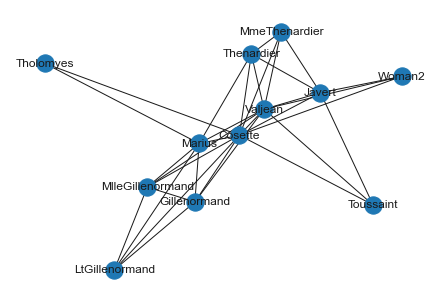

In [43]:
C = nx.ego_graph(les, "Cosette")
nx.draw(C, with_labels=True)
print(nx.density(C), nx.average_clustering(C), nx.average_shortest_path_length(C))

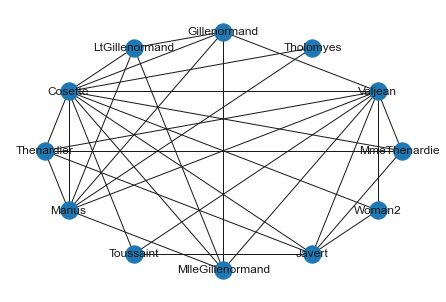

In [44]:
nx.draw_circular(C, with_labels=True)

## Francis Bacon

In [45]:
ff = nx.florentine_families_graph()
ff.number_of_nodes(), ff.number_of_edges()

(15, 20)

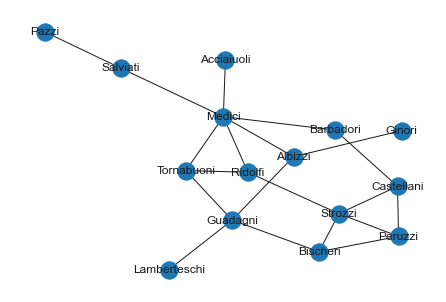

In [52]:
nx.draw(ff, with_labels=True)

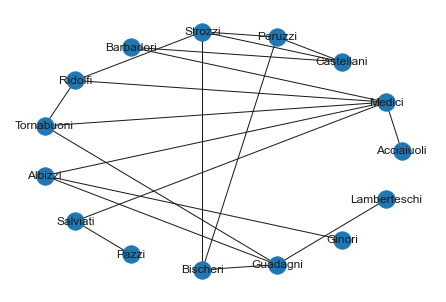

In [47]:
nx.draw_circular(ff, with_labels=True)

In [48]:
degs = ff.degree()
aa, bb = np.histogram(list(dict(degs).values()))

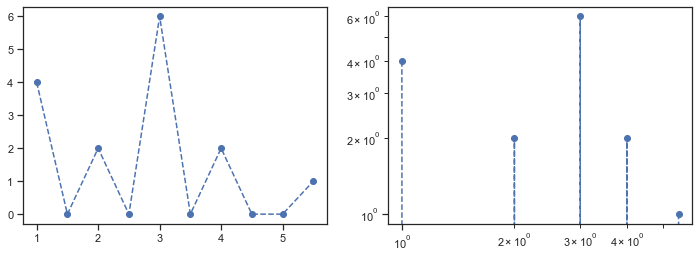

In [49]:
fig = plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(bb[:-1], aa, 'o--')
plt.subplot(122)
plt.loglog(bb[:-1], aa, 'o--')

In [50]:
ff.nodes(data=True)

NodeDataView({'Acciaiuoli': {}, 'Medici': {}, 'Castellani': {}, 'Peruzzi': {}, 'Strozzi': {}, 'Barbadori': {}, 'Ridolfi': {}, 'Tornabuoni': {}, 'Albizzi': {}, 'Salviati': {}, 'Pazzi': {}, 'Bischeri': {}, 'Guadagni': {}, 'Ginori': {}, 'Lamberteschi': {}})

In [51]:
ff_degree_sequence = sorted((d for n, d in ff.degree()), reverse=True)
print(ff_degree_sequence)
print(f"Average degree: {np.average(ff_degree_sequence)}")
print(f"Clustering coefficient: {nx.average_clustering(ff)}")

[6, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1]
Average degree: 2.6666666666666665
Clustering coefficient: 0.16
